In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pylab as plt
import ghostpy.Invariants.LShell as ls
import ghostpy.algorithms.convert as algx
import ghostpy.algorithms.common as algc
import ghostpy.algorithms.FieldTracers as ft
import ghostpy.algorithms.DipoleField as df
import ghostpy.data.VtkData as vdt
import ghostpy.data.LfmVtkData as lvdt
import ghostpy.data.DipoleData as dpd
import ghostpy.data.GpData as gpd
import ghostpy.plotting.FieldLinePlot as flplt
import ghostpy.Invariants.FieldLine as fl
import csv

In [3]:
data_dpg3 = vdt.VtkData(filename="/Users/jjm390/src/ghostpy/ghostpy/unit_tests/test_data/dipole_dp0_3_grid.vts", vector="B")
data_dpg7 = vdt.VtkData(filename="/Users/jjm390/src/ghostpy/ghostpy/unit_tests/test_data/dipole_dp0_7_grid.vts", vector="B")
data_dpg9 = vdt.VtkData(filename="/Users/jjm390/src/ghostpy/ghostpy/unit_tests/test_data/dipole_dp0_9_grid.vts", vector="B")
print ("Data Sources Configured.")

Data Sources Configured.


In [4]:
data_dpg13 = vdt.VtkData(filename="/Users/jjm390/src/ghostpy/ghostpy/unit_tests/test_data/dipole_dp0_13_grid.vts", vector="B")
data_dpg17 = vdt.VtkData(filename="/Users/jjm390/src/ghostpy/ghostpy/unit_tests/test_data/dipole_dp0_17_grid.vts", vector="B")
data_dpg19 = vdt.VtkData(filename="/Users/jjm390/src/ghostpy/ghostpy/unit_tests/test_data/dipole_dp0_19_grid.vts", vector="B")
print ("Data Sources Configured.")

Data Sources Configured.


In [5]:
tcount = 10

relist = np.linspace(start=2.5, stop=10.5, num=tcount, endpoint=True)
# philist = np.linspace(start=0, stop=np.pi*2, num=tcount, endpoint=False)
philist = 0
zlist = 0

# loclist = np.column_stack((relist, zlist, philist))

x,y,z = algc.sphere_to_cart(r=relist, lam=zlist, phi=philist)

loclist = np.column_stack((x,y,z))

In [6]:
print ("Location List: \n{}".format(loclist))

Location List: 
[[  2.5          0.           0.        ]
 [  3.38888889   0.           0.        ]
 [  4.27777778   0.           0.        ]
 [  5.16666667   0.           0.        ]
 [  6.05555556   0.           0.        ]
 [  6.94444444   0.           0.        ]
 [  7.83333333   0.           0.        ]
 [  8.72222222   0.           0.        ]
 [  9.61111111   0.           0.        ]
 [ 10.5          0.           0.        ]]


In [7]:
fp3 = []
fp_ideal = []
fp7 = []
fp9 = []
fp13 = []
fp17 = []
fp19 = []
Ls = []

In [8]:
fp_ideal = []
for loc in loclist:
    L = algc.mag(loc)
    Ls.append(L)
    fp_ideal.append(df.dipole_footprint(L=L, r=1.0))

fp_ideal = np.array(fp_ideal)

In [9]:
fp3 = []
for loc in loclist:
    print ("Calculating {} on 1/3 RE Square Dipole Grid".format(loc))
    fl3 = fl.FieldLine(data=data_dpg3, start=loc, error_tol=1e-6)
    fp3.append(fl3.get_footprint_rlp(re=1.0)[1])

fp3 = np.array(fp3)

Calculating [ 2.5  0.   0. ] on 1/3 RE Square Dipole Grid


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


ghostpy/Invariants/FieldLine.py:708: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt(int_list[0] - int_list) * ds


Calculating [ 3.38888889  0.          0.        ] on 1/3 RE Square Dipole Grid


Calculating [ 4.27777778  0.          0.        ] on 1/3 RE Square Dipole Grid


Calculating [ 5.16666667  0.          0.        ] on 1/3 RE Square Dipole Grid


Calculating [ 6.05555556  0.          0.        ] on 1/3 RE Square Dipole Grid


Calculating [ 6.94444444  0.          0.        ] on 1/3 RE Square Dipole Grid


Calculating [ 7.83333333  0.          0.        ] on 1/3 RE Square Dipole Grid


Calculating [ 8.72222222  0.          0.        ] on 1/3 RE Square Dipole Grid


Calculating [ 9.61111111  0.          0.        ] on 1/3 RE Square Dipole Grid


Calculating [ 10.5   0.    0. ] on 1/3 RE Square Dipole Grid


In [10]:
fp7 = []
for loc in loclist:
    print ("Calculating {} on 1/7 RE Square Dipole Grid".format(loc))
    fl7 = fl.FieldLine(data=data_dpg7, start=loc, error_tol=1e-6)
    fp7.append(fl7.get_footprint_rlp(re=1.0)[1])
fp7 = np.array(fp7)

Calculating [ 2.5  0.   0. ] on 1/7 RE Square Dipole Grid


Calculating [ 3.38888889  0.          0.        ] on 1/7 RE Square Dipole Grid


Calculating [ 4.27777778  0.          0.        ] on 1/7 RE Square Dipole Grid


Calculating [ 5.16666667  0.          0.        ] on 1/7 RE Square Dipole Grid


Calculating [ 6.05555556  0.          0.        ] on 1/7 RE Square Dipole Grid


Calculating [ 6.94444444  0.          0.        ] on 1/7 RE Square Dipole Grid


Calculating [ 7.83333333  0.          0.        ] on 1/7 RE Square Dipole Grid


Calculating [ 8.72222222  0.          0.        ] on 1/7 RE Square Dipole Grid


Calculating [ 9.61111111  0.          0.        ] on 1/7 RE Square Dipole Grid


Calculating [ 10.5   0.    0. ] on 1/7 RE Square Dipole Grid


In [11]:
fp9 = []
for loc in loclist:
    print ("Calculating {} on 1/9 RE Square Dipole Grid".format(loc))
    fl9 = fl.FieldLine(data=data_dpg9, start=loc, error_tol=1e-6)
    fp9.append(fl9.get_footprint_rlp(re=1.0)[1])
fp9 = np.array(fp9)

Calculating [ 2.5  0.   0. ] on 1/9 RE Square Dipole Grid


Calculating [ 3.38888889  0.          0.        ] on 1/9 RE Square Dipole Grid


Calculating [ 4.27777778  0.          0.        ] on 1/9 RE Square Dipole Grid


Calculating [ 5.16666667  0.          0.        ] on 1/9 RE Square Dipole Grid


Calculating [ 6.05555556  0.          0.        ] on 1/9 RE Square Dipole Grid


Calculating [ 6.94444444  0.          0.        ] on 1/9 RE Square Dipole Grid


Calculating [ 7.83333333  0.          0.        ] on 1/9 RE Square Dipole Grid


Calculating [ 8.72222222  0.          0.        ] on 1/9 RE Square Dipole Grid


Calculating [ 9.61111111  0.          0.        ] on 1/9 RE Square Dipole Grid


Calculating [ 10.5   0.    0. ] on 1/9 RE Square Dipole Grid


In [12]:
fp13 = []
for loc in loclist:
    print ("Calculating {} on 1/13 RE Square Dipole Grid".format(loc))
    fl13 = fl.FieldLine(data=data_dpg13, start=loc, error_tol=1e-6)
    fp13.append(fl13.get_footprint_rlp(re=1.0)[1])
fp13 = np.array(fp13)

Calculating [ 2.5  0.   0. ] on 1/13 RE Square Dipole Grid


Calculating [ 3.38888889  0.          0.        ] on 1/13 RE Square Dipole Grid


Calculating [ 4.27777778  0.          0.        ] on 1/13 RE Square Dipole Grid


Calculating [ 5.16666667  0.          0.        ] on 1/13 RE Square Dipole Grid


Calculating [ 6.05555556  0.          0.        ] on 1/13 RE Square Dipole Grid


Calculating [ 6.94444444  0.          0.        ] on 1/13 RE Square Dipole Grid


Calculating [ 7.83333333  0.          0.        ] on 1/13 RE Square Dipole Grid


Calculating [ 8.72222222  0.          0.        ] on 1/13 RE Square Dipole Grid


Calculating [ 9.61111111  0.          0.        ] on 1/13 RE Square Dipole Grid


Calculating [ 10.5   0.    0. ] on 1/13 RE Square Dipole Grid


In [25]:
fp17 = []
for loc in loclist:
    print ("Calculating {} on 1/17 RE Square Dipole Grid".format(loc))
    fl17 = fl.FieldLine(data=data_dpg17, start=loc, error_tol=1e-6)
    fp17.append(fl17.get_footprint_rlp(re=1.0)[1])
fp17 = np.array(fp17)

Calculating [ 2.5  0.   0. ] on 1/17 RE Square Dipole Grid


Calculating [ 3.38888889  0.          0.        ] on 1/17 RE Square Dipole Grid


Calculating [ 4.27777778  0.          0.        ] on 1/17 RE Square Dipole Grid


Calculating [ 5.16666667  0.          0.        ] on 1/17 RE Square Dipole Grid


Calculating [ 6.05555556  0.          0.        ] on 1/17 RE Square Dipole Grid


Calculating [ 6.94444444  0.          0.        ] on 1/17 RE Square Dipole Grid


Calculating [ 7.83333333  0.          0.        ] on 1/17 RE Square Dipole Grid


Calculating [ 8.72222222  0.          0.        ] on 1/17 RE Square Dipole Grid


Calculating [ 9.61111111  0.          0.        ] on 1/17 RE Square Dipole Grid


Calculating [ 10.5   0.    0. ] on 1/17 RE Square Dipole Grid


In [ ]:
# for loc in loclist:
#     print ("Calculating {} on 1/19 RE Square Dipole Grid".format(loc))
#     fl19 = fl.FieldLine(data=data_dpg19, start=loc, error_tol=1e-6)
#     fp19.append(fl19.get_footprint_rlp(re=1.0)[1])
# fp19 = np.array(fp19)

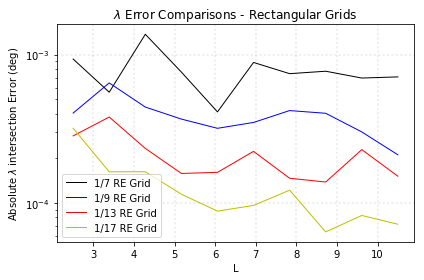

In [31]:
x = Ls

fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(x, (algx.rad_to_deg(np.abs(fp3 - fp_ideal))), label="1/3 RE Grid")
ax.semilogy(x, (np.abs(fp7 - fp_ideal)), 'k', lw=1, label="1/7 RE Grid")
ax.semilogy(x, (np.abs(fp9 - fp_ideal)), 'b', lw=1,label="1/9 RE Grid")
ax.semilogy(x, (np.abs(fp13 - fp_ideal)), 'r', lw=1,label="1/13 RE Grid")
ax.semilogy(x, (np.abs(fp17 - fp_ideal)), 'y', lw=1,label="1/17 RE Grid")
# ax.plot(x, (algx.rad_to_deg(np.abs(fp19 - fp_ideal))), label="1/19 RE Rect. Grid")

ax.set_ylabel("Absolute $\lambda$ intersection Error (deg)")
ax.set_xlabel("L")
ax.set_title("$\lambda$ Error Comparisons - Rectangular Grids")
plt.legend(loc='best')
plt.tight_layout()
plt.grid(b=True, which='major', color='grey', linewidth=0.25, linestyle=':')
plt.show()
fig.savefig("/Volumes/8TB Seagate/PhD Data/profiles/rectangular_grid_fp_error.pdf")